# Exploration

Let's explore the interactions of all attributes and target variable to help discover drivers of our target variable. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

import wrangle

## Acquire and Prepare Data

We're going to acquire the student grade data like we saw in the prior lesson.

In [2]:
# Use our wrangle function to acquire and prepare our data.
df = wrangle.wrangle_zillow()

In [3]:
#look at your data!
df.head()

,beds,baths,sqft,tax_value,built,taxes,location
0,4.0,3.0,2090.0,615000.0,1973.0,8625.75,6037.0
1,5.0,3.0,2479.0,531642.0,1973.0,6722.67,6037.0
2,4.0,2.0,2057.0,328148.0,1973.0,4160.63,6037.0
3,4.0,3.0,2423.0,297377.0,1978.0,3883.47,6037.0
4,4.0,3.0,2226.0,297001.0,1978.0,3884.27,6037.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3704918 entries, 0 to 4301224
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   beds       float64
 1   baths      float64
 2   sqft       float64
 3   tax_value  float64
 4   built      float64
 5   taxes      float64
 6   location   float64
dtypes: float64(7)
memory usage: 226.1 MB


In [5]:
df.shape

(3704918, 7)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
beds,3704918.0,3.213755,0.781255,2.00,3.00,3.00,4.0000,5.00
baths,3704918.0,2.051922,0.706868,1.00,2.00,2.00,2.5000,4.00
sqft,3704918.0,1652.464956,563.558826,308.00,1230.00,1547.00,1986.0000,3405.00
tax_value,3704918.0,320573.819429,194802.487888,22.00,169564.25,289941.00,441500.0000,926434.00
built,3703173.0,1959.400811,20.502873,1801.00,1949.00,1957.00,1972.0000,2016.00
taxes,3704918.0,4057.427478,2232.781688,16.38,2361.70,3738.26,5469.7175,10348.21
location,3704918.0,6048.344705,20.552089,6037.00,6037.00,6037.00,6059.0000,6111.00


#### target variable?
- final grade!
- continious aka regression problem

- tax_value for zillow

#### other variables of value?
- exam1, exam2, exam3
- all continious

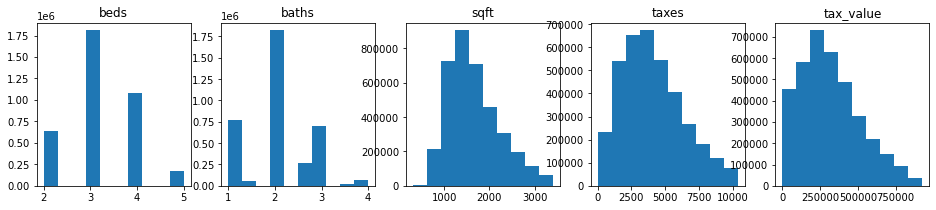

In [10]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['beds', 'baths', 'sqft', 'taxes', 'tax_value']
for i, col in enumerate(cols):
    # i starts at 0, but plot nos should start at 1
    subplot_num = i+1
    # Create subplot.
    plt.subplot(1,5,subplot_num)
    # Title with column name.
    plt.title(col)
    # Display histogram for column.
    df[col].hist(bins=10)
    # Hide gridlines.
    plt.grid(False)

### What must we do before exploring relationships? 

In [39]:
train, val, test = wrangle.split_data(df)

In [40]:
train.shape, val.shape, test.shape

((2222950, 7), (740984, 7), (740984, 7))

## Explore

### Why Explore?
 - What is the purpose of this pipeline stage?

### Main Stages in Exploration
- Hypothesize
- Visualize
    - Plot out the distributions of each feature 
     - Why?
    - Plot out the interaction of two or more variables?
     - Why?
    - Plot out how subgroups compare to each-other and to the overall population?
     - Why?
    - Document takeaways
     - Why?
    - Identify features that correlate with each other
     - Why?

- Test Hypotheses

### Types of Visualizations

- **Univariate Distributions**
    
    - Continuous variable distributions
        - ?
        - ?
        - ? 
    - Discrete variable distributions
        - ?


- **Bi- and multi-variate relationships** 

    - Continuous with Continuous
        - ?
        - ?
        - ?
        - ?
        - ?
    - Discrete with Continuous
        - ?
        - ?
        - ?
        - ?
        - ?
        
    - Discrete with Discrete
        - ?

___

## Explore our exam dataset
### Goal

> I'm a university professor hoping I can build a prediction model that will be able to use these exams to predict the final grade within 5 points average per student.

## Q1. Is there a relationship between taxes and tax value? 

In [13]:
# check for correlation of two continuous values

### Hypothesis

- ${H_0}$: There is no linear correlation between taxes and tax value.
- ${H_a}$: There is linear correlation relationship between taxes and tax value.

### Visualize

### `sns.heatmap()`

Let's look at a heatmap of the correlation coefficients for a dataset.

1. Determine if normally distributed
    - if normal, use pearsons method
    - if not, use spearman
2. Calculate the correlation coefficient for each pair of variables
    - use pandas `.corr()` 
    - it defaults to `method=pearson` for normal distributions
    - can change to `method=spearman` for not normal distributions
3. Use correleation coefficients to generate heatmap 


In [41]:
# create the correlation matrix using pandas .corr()
zil_corr = train.drop(columns=['built', 'location']).corr(method='spearman')

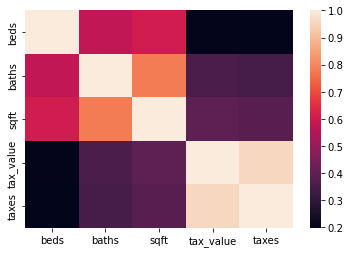

In [42]:
# pass my correlation matrix to Seaborn's heatmap
sns.heatmap(zil_corr)
plt.show()

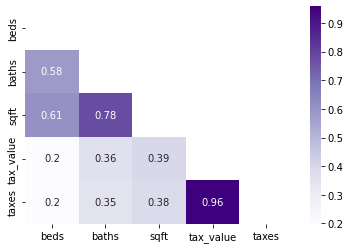

In [43]:
# pass my correlation matrix to Seaborn's heatmap with customization
sns.heatmap(zil_corr, cmap='Purples', annot=True, mask=np.triu(zil_corr))
plt.show()

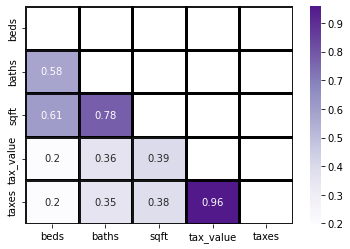

In [44]:
# pass my correlation matrix to Seaborn's heatmap with more customization! 
kwargs = {'alpha':.9,
          'linewidth':3, 
          'linestyle':'-',
          'linecolor':'black'}

sns.heatmap(zil_corr, cmap='Purples', annot=True, mask=np.triu(zil_corr), **kwargs)
plt.show()

### Test Hypothesis

In [45]:
# Since my variables are not normally distributed, 
# use scipy stats function spearmanr to calculate correlation and p-value 
r, p = spearmanr(train.taxes, train.tax_value)

In [46]:
print(f'Correlation Coefficient by Spearman Test: {r}\np-value: {p}')

Correlation Coefficient by Spearman Test: 0.957735719554417
p-value: 0.0


In [47]:
# set alpha : 0.05
if p < 0.05:
    print('We can reject the null hypothesis')
else:
    print('we cannot reject the null hypothesis')

We can reject the null hypothesis


#### Heatmap Takeaways

- Although all of the exams have very high positive correlations with the target variable, `exam1` and `final_grade` are almost perfectly correlated. This looks to be the best predictor of our target variable.
- Based on my correlation coefficient and my p-value, **I reject my Null hypothesis that there is no correlation between `exam1` and `final_grade`.**
- Looking at the correlation between our independent variables, they also have high positive correlations with each other, multicollinearity. This informs me that I don't want to use all of them together in a linear regression model. 
- When building my model, I will choose `exam1` and perform a simple linear regression first. If I want to go back and do some feature engineering with my other independent variables, I could do that and see if I can improve on my accuracy.

### What other visualizations could we have used?

### `sns.relplot()`

Let's do a simple scatter plot of two continuous variables in our dataset.

In [ ]:
sns.relplot(data=train, x='taxes', y='tax_value')
plt.show()

### `sns.lmplot()`

Let's make that simple scatter plot but add a regression line.

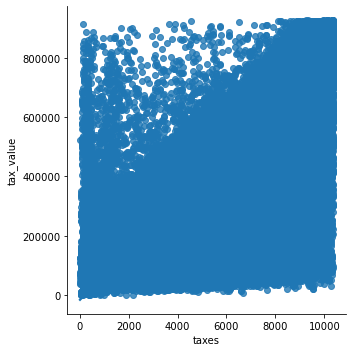

In [73]:
# I can really pop that line color if I want
sns.lmplot(data=train, x='taxes', y='tax_value')
plt.show()

### `sns.jointplot()`

Let's use a `sns.jointplot()` with `kind=reg` to view individual variable distributions for our x and y along with a scatter plot with regression line.

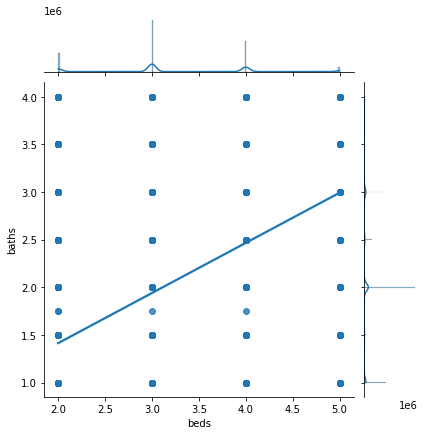

In [54]:
sns.jointplot(data=train, x='beds', y='baths', kind='reg')
plt.show()

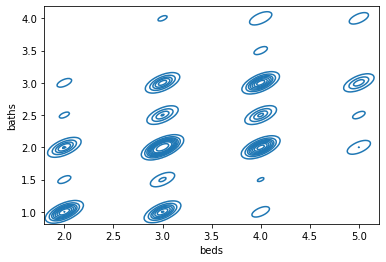

In [55]:
sns.kdeplot(data=train, x='beds', y='baths')
plt.show()

### `sns.pairplot()`

Let's use `sns.pairplot()` to view a scatter plot visualizing the relationships between all of the numeric columns in our dataset all at once as well as individual distributions for each individual column.

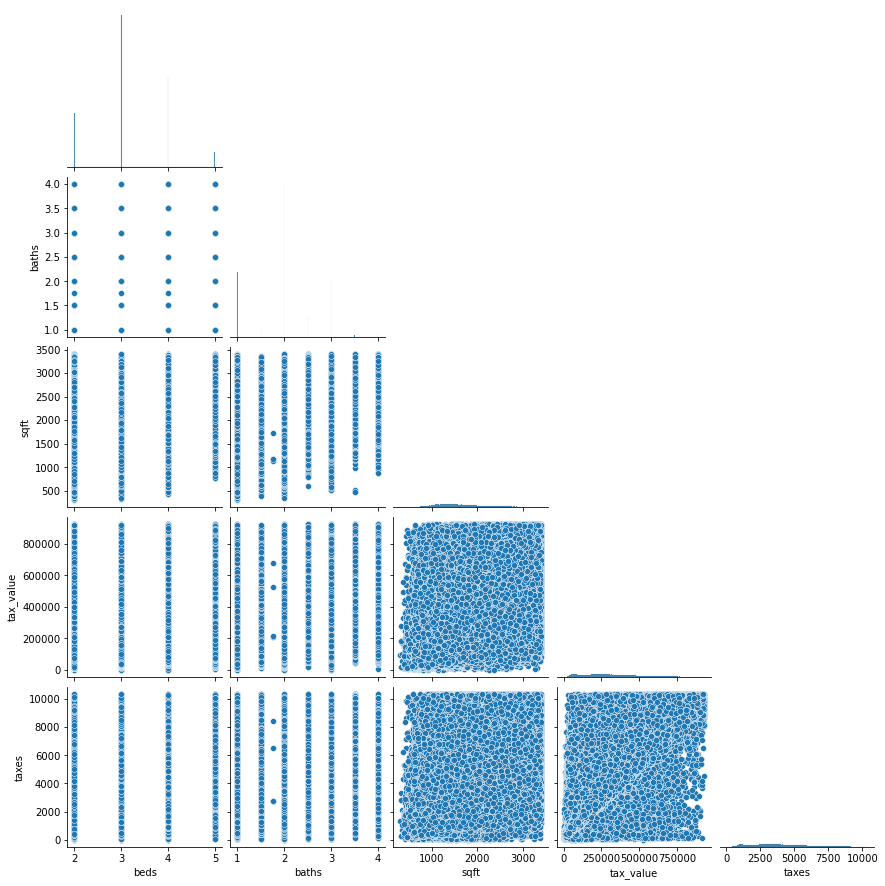

In [51]:
# We can drop the redundant information in the upper right half of the chart if we like.
sns.pairplot(data=train.drop(columns=['built', 'location']), corner=True)
plt.show()

Takeways
- My `relplot`, `lmplot`, and `joinplots` charts show me that there is a linear relationship between `exam1` and `final_grade`.
- My `pairplot` shows me that there are linear relationships between the other exams scores, as well 

___

## Q2: Is there a cutoff in grade that makes sense to investigate? Passing/failing/letter grades?

In [56]:
#number of people who failed each test
train.location.value_counts()

6037.0    1488269
6059.0     560312
6111.0     174369
Name: location, dtype: int64

### Make categorical values for further exploration

In [57]:
#assign fail and pass for each test
train.built.value_counts()

1955.0    96455
1950.0    80544
1954.0    78693
1953.0    70484
1956.0    69289
          ...  
1833.0        1
1823.0        1
1877.0        1
1862.0        1
1801.0        1
Name: built, Length: 151, dtype: int64

In [59]:
train.location = train.location.astype(str)

### Whats the relationship between passing exam1 and the final_exam grade?

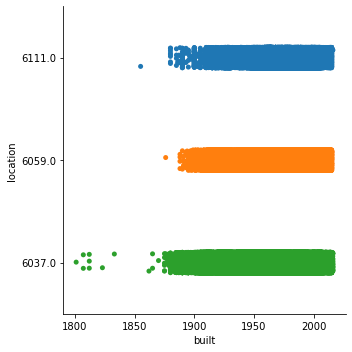

In [68]:
#seaborn histplot 
sns.catplot(data=train, x='built', y='location')

#set line for passing level


In [72]:
#mean final_grade by exam1 pass/fail status


### What percentage of students failed exam1 and the final?

### Of the students who failed exam1, how many also failed the final?

In [ ]:
#create subset of people who failed exam1


In [ ]:
#how many failed final


In [ ]:
#percentage who failed final


### Of the students who failed exam2, how many also failed the final?

In [ ]:
#create subset of people who failed exam2


In [ ]:
#how many failed final


In [ ]:
#percentage who failed final


### Of the students who failed both exam1 and exam2, how many also failed the final?

In [ ]:
#create subset of people who failed exam2


In [ ]:
#how many failed final


In [ ]:
#percentage who failed final


#### Takeways
- exam1 and exam2 have a better reflection if someone passes the final exam
- given the multicollinearity present, we may want to just focus on one exam
- we could create a new feature that captures if a student failed both exam1 and exam2 